# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
%load_ext autoreload
%aimport agent

In [3]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.22 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [4]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
# Udacity provided starter code
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    print("\t", type(actions))
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    print("\t", type(actions))\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards               

In [9]:
import queue
from collections import deque

# parameters
print_every = 100
# seems to be 1000 for the env anyway
max_ts = 1000
max_episodes = 500

curr_agent = agent.Agent(state_size, action_size, num_agents)

# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = np.zeros(num_agents)
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # env_info's variables are lists
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards
            next_state = env_info.vector_observations
            done = env_info.local_done
            
            score = score + reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            if np.any(done): 
                if t < 1000:
                    print("episode {} at {} ts; done reached".format(i, t))
                break
        # goal for 20 agent version: [version 2] the agent is able to receive an *average* reward (over 100 episodes, and over all 20 agents) of at least +30
        scores_history.append(np.mean(score))
        scores.append(np.mean(score))
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)
        
        

episode 0; average score past 100 episodes: 0.25999999418854713
episode 100; average score past 100 episodes: 9.809309780744837
Solved in 196 episodes
[0.25999999418854713, 0.82699998151510956, 0.80999998189508915, 1.111999975144863, 0.95199997872114184, 0.85899998079985385, 0.77649998264387254, 0.81699998173862698, 0.75399998314678673, 1.1524999742396176, 1.6509999630972743, 1.8824999579228461, 1.5514999653212727, 1.1974999732337892, 1.1789999736472965, 1.548999965377152, 1.3214999704621733, 1.549499965365976, 1.9759999558329582, 2.6074999417178333, 3.5399999208748341, 2.9739999335259197, 3.3299999255686998, 2.822999936901033, 3.5214999212883411, 3.6449999185279012, 4.3089999036863444, 3.8949999129399657, 4.1559999071061613, 4.3774999021552503, 5.2574998824857175, 5.2364998829551039, 5.741999871656299, 6.3619998577982191, 6.9109998455271127, 5.8834998684935274, 6.2294998607598249, 7.0354998427443203, 7.1714998397044836, 7.8859998237341644, 7.8044998255558315, 7.0139998432248829, 9.315

In [1]:
scores_history = [0.25999999418854713, 0.82699998151510956, 0.80999998189508915, 1.111999975144863, 0.95199997872114184, 0.85899998079985385, 0.77649998264387254, 0.81699998173862698, 0.75399998314678673, 1.1524999742396176, 1.6509999630972743, 1.8824999579228461, 1.5514999653212727, 1.1974999732337892, 1.1789999736472965, 1.548999965377152, 1.3214999704621733, 1.549499965365976, 1.9759999558329582, 2.6074999417178333, 3.5399999208748341, 2.9739999335259197, 3.3299999255686998, 2.822999936901033, 3.5214999212883411, 3.6449999185279012, 4.3089999036863444, 3.8949999129399657, 4.1559999071061613, 4.3774999021552503, 5.2574998824857175, 5.2364998829551039, 5.741999871656299, 6.3619998577982191, 6.9109998455271127, 5.8834998684935274, 6.2294998607598249, 7.0354998427443203, 7.1714998397044836, 7.8859998237341644, 7.8044998255558315, 7.0139998432248829, 9.315499791782349, 7.1659998398274185, 7.6839998282492159, 8.6849998058751225, 9.0064997986890383, 8.8914998012594886, 9.8759997792541974, 10.670999761484563, 10.203999771922827, 11.658499739412218, 9.8984997787512832, 10.995499754231423, 10.244499771017582, 11.174999750219285, 9.4099997896701097, 9.7374997823499143, 11.192999749816954, 15.216999659873546, 12.333499724324792, 12.915499711316079, 13.408999700285495, 12.409499722626061, 12.672999716736376, 11.970499732438475, 14.337999679520726, 15.064499663282186, 15.943499643635004, 14.22699968200177, 19.195999570935964, 19.59499956201762, 17.685999604687094, 15.413999655470253, 14.908499666769057, 16.776499625016005, 16.713499626424163, 16.094999640248716, 15.719999648630619, 16.09449964025989, 18.615999583899974, 16.283499636035412, 15.947499643545598, 15.514499653223902, 13.14449970619753, 13.249999703839421, 14.709499671217054, 14.284999680705369, 13.541999697312713, 14.469499676581473, 14.261499681230635, 14.282499680761248, 17.449999609962106, 16.383499633800238, 16.893999622389675, 21.93099950980395, 18.545999585464596, 20.028999552316964, 22.999499485921113, 22.242999502830209, 22.007499508094043, 22.127999505400659, 26.668499403912573, 23.677999470755459, 22.062999506853522, 26.560999406315386, 26.544499406684189, 27.429499386902897, 28.274499368015675, 31.920499286521228, 28.920999353565275, 31.113499304559081, 34.306999233178793, 33.544999250210822, 33.18849925817922, 31.337999299541117, 31.446499297115952, 31.223999302089215, 30.629999315366149, 31.040999306179582, 27.212999391742052, 27.107499394100159, 32.404999275691807, 31.149999303743243, 35.910999197326603, 33.48199925161898, 32.881499265041199, 29.100999349541961, 28.482499363366514, 29.815499333571644, 24.692499448079616, 31.880499287415297, 30.063999328017236, 35.754999200813472, 35.985999195650223, 35.194999213330448, 35.904999197460711, 33.893999242410061, 30.628999315388501, 32.559499272238462, 31.846499288175256, 33.198999257944521, 31.859499287884681, 29.424999342299998, 30.40249932045117, 30.468499318975955, 29.781499334331603, 31.499999295920134, 30.901999309286474, 32.562999272160233, 32.765999267622831, 30.801999311521648, 26.590999405644833, 31.830499288532884, 29.979499329905956, 26.513999407365919, 26.400999409891664, 24.0414994626306, 25.036999440379439, 26.001499418821187, 29.511999340355395, 29.885999331995844, 24.535999451577663, 24.166999459825455, 24.663499448727816, 28.851999355107544, 28.547499361913651, 29.66499933693558, 33.063499260973188, 30.591499316226692, 32.076499283034352, 34.222499235067517, 35.066999216191469, 35.596999204345046, 33.603499248903248, 32.843499265890571, 31.173999303206802, 33.451499252300707, 31.937499286141247, 31.882499287370592, 32.213499279972169, 33.936999241448937, 31.264999301172793, 34.738999223522839, 32.307499277871102, 34.133999237045643, 32.10899928230792, 30.538999317400158, 33.186499258223918, 30.563999316841365, 29.660499337036164, 28.236999368853866, 27.724999380297959, 25.028999440558255, 25.875999421626329, 27.581499383505435, 32.104499282408504]

In [5]:
# smoother plot
avg_scores = []
window_size = 100
for i in range(window_size, len(scores_history)):
    avg_scores.append(sum(scores_history[i-window_size:i])/window_size)

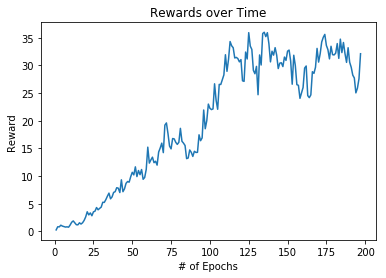

In [8]:
# plot of rewards

import matplotlib.pyplot as plt
plt.title("Rewards over Time")
plt.xlabel("# of Epochs")
plt.ylabel("Reward")
plt.plot(range(1,len(scores_history) +1 ), scores_history)


starts at episode 100 and averages the past 100 episodes


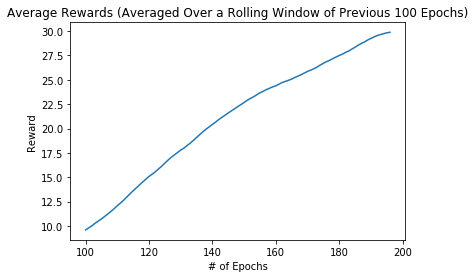

In [15]:
print("starts at episode {} and averages the past {} episodes".format(window_size, window_size))
plt.title("Average Rewards (Averaged Over a Rolling Window of Previous 100 Epochs)")
plt.xlabel("# of Epochs")
plt.ylabel("Reward")
plt.plot(range(100,len(avg_scores) +100 ), avg_scores)

In [11]:
import importlib
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [10]:
%autoreload 1

When finished, you can close the environment.

In [19]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 